<a href="https://colab.research.google.com/github/Herdvair/Tasks/blob/main/Data_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_supermarket = pd.read_csv('supermarket_sales.csv')

In [ ]:
df_supermarket.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [ ]:
df_supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df_supermarket.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Nomor 1

##  Apakah produk dengan omzet (Total) tertinggi juga menghasilkan keuntungan (gross income) tertinggi?

In [ ]:
# pertama kita menghitung omzet (total) dan total (gross income) untuk tiap product line

product_summary = df_supermarket.groupby('Product line').agg({
    'gross income': 'sum',
    'Total': 'sum',
}).reset_index()

In [ ]:
product_summary

,Product line,gross income,Total
0,Electronic accessories,2587.5015,54337.5315
1,Fashion accessories,2585.9950,54305.8950
2,Food and beverages,2673.5640,56144.8440
3,Health and beauty,2342.5590,49193.7390
4,Home and lifestyle,2564.8530,53861.9130
5,Sports and travel,2624.8965,55122.8265


In [ ]:
#untuk melihat produk yang memiliki rata-rata rating
product_rating = df_supermarket.groupby('Product line')['Rating'].agg('mean').reset_index()
product_rating

,Product line,Rating
0,Electronic accessories,6.924706
1,Fashion accessories,7.029213
2,Food and beverages,7.113218
3,Health and beauty,7.003289
4,Home and lifestyle,6.837500
5,Sports and travel,6.916265


In [ ]:
result_product = pd.merge(product_summary, product_rating, on='Product line', how='left')
result_product

,Product line,gross income,Total,Rating
0,Electronic accessories,2587.5015,54337.5315,6.924706
1,Fashion accessories,2585.9950,54305.8950,7.029213
2,Food and beverages,2673.5640,56144.8440,7.113218
3,Health and beauty,2342.5590,49193.7390,7.003289
4,Home and lifestyle,2564.8530,53861.9130,6.837500
5,Sports and travel,2624.8965,55122.8265,6.916265


In [ ]:
omzet_tertinggi=result_product.sort_values(by='Total', ascending=False)
print("\nProduk Omzet tertinggi dengan Rata-rata Rating:")
omzet_tertinggi.head()


Produk Omzet tertinggi dengan Rata-rata Rating:


,Product line,gross income,Total,Rating
2,Food and beverages,2673.5640,56144.8440,7.113218
5,Sports and travel,2624.8965,55122.8265,6.916265
0,Electronic accessories,2587.5015,54337.5315,6.924706
1,Fashion accessories,2585.9950,54305.8950,7.029213
4,Home and lifestyle,2564.8530,53861.9130,6.837500


In [ ]:
profit_tertinggi=result_product.sort_values(by='Total', ascending=False)
print("\nProduk Profit tertinggi dengan Rata-rata Rating:")
omzet_tertinggi.head()


Produk Profit tertinggi dengan Rata-rata Rating:


,Product line,gross income,Total,Rating
2,Food and beverages,2673.5640,56144.8440,7.113218
5,Sports and travel,2624.8965,55122.8265,6.916265
0,Electronic accessories,2587.5015,54337.5315,6.924706
1,Fashion accessories,2585.9950,54305.8950,7.029213
4,Home and lifestyle,2564.8530,53861.9130,6.837500


In [ ]:
tabel_pivot = pd.pivot_table(df_supermarket, values=['Total','gross income','Rating'], index='Product line', aggfunc={'Total' : 'sum', 'gross income' :'sum', 'Rating':'mean'})


In [ ]:
tabel_pivot.rename(columns={'Total': 'Total Omzet', 'gross income': 'Total Profit', 'Rating': 'Rata-rata Rating'}, inplace=True)

In [ ]:
tabel_pivot

,Rata-rata Rating,Total Omzet,Total Profit
Product line,,,
Electronic accessories,6.924706,54337.5315,2587.5015
Fashion accessories,7.029213,54305.8950,2585.9950
Food and beverages,7.113218,56144.8440,2673.5640
Health and beauty,7.003289,49193.7390,2342.5590
Home and lifestyle,6.837500,53861.9130,2564.8530
Sports and travel,6.916265,55122.8265,2624.8965


*** interpretasi ***

1.  Omzet dan profit
- Produk food and beverage memberikan omzet dan profit tertinggi, hal ini dikarenakan total omzet yang dihasilkan adalah Rp. 56.144 dan profit yang dihasilkan Rp. 2.673. Artinya, keumngkinan produk dengan omzet tertinggi juga menghasilkan profit tertinggi

2. Rating pelanggan
*   Produk dengan rata-rata rating tertinggi adalah food and beverage, hal ini didukung dengan omzet dan profit yang tinggi juga
*   produk dengan rata-rata rating terendah adalah Home and lifestyle, namun omzet dan profitnya lebih tinggi dibanding health and beauty. Hal ini mengindikasikan ada faktor lain yang memengaruhi kepuasan pelanggan selain profit dan omzet. Oleh karena itu, perlu ditelusuri lebih lanjut.




# No. 2 Standar scaller for EDA

In [ ]:
df_market = df_supermarket.copy()

In [ ]:
df_market.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Kolom-kolom yang ingin di-standarisasi
columns_to_stdscaller = ['Total', 'Unit price', 'Tax 5%', 'gross income']
scaler = StandardScaler()

In [ ]:
scaled_arr = scaler.fit_transform(df_market[columns_to_stdscaller])
scaled_df = pd.DataFrame(scaled_arr, columns=[col + '_stdscaled' for col in columns_to_stdscaller])

In [ ]:
scaled_df.head()

,Total_stdscaled,Unit price_stdscaled,Tax 5%_stdscaled,gross income_stdscaled
0,0.919607,0.718160,0.919607,0.919607
1,-0.987730,-1.525303,-0.987730,-0.987730
2,0.071446,-0.352781,0.071446,0.071446
3,0.675780,0.096214,0.675780,0.675780
4,1.267125,1.156959,1.267125,1.267125


In [ ]:
append_df = pd.concat([df_market[columns_to_stdscaller], scaled_df], axis=1)

In [ ]:
append_df.head()

,Total,Unit price,Tax 5%,gross income,Total_stdscaled,Unit price_stdscaled,Tax 5%_stdscaled,gross income_stdscaled
0,548.9715,74.69,26.1415,26.1415,0.919607,0.718160,0.919607,0.919607
1,80.2200,15.28,3.8200,3.8200,-0.987730,-1.525303,-0.987730,-0.987730
2,340.5255,46.33,16.2155,16.2155,0.071446,-0.352781,0.071446,0.071446
3,489.0480,58.22,23.2880,23.2880,0.675780,0.096214,0.675780,0.675780
4,634.3785,86.31,30.2085,30.2085,1.267125,1.156959,1.267125,1.267125


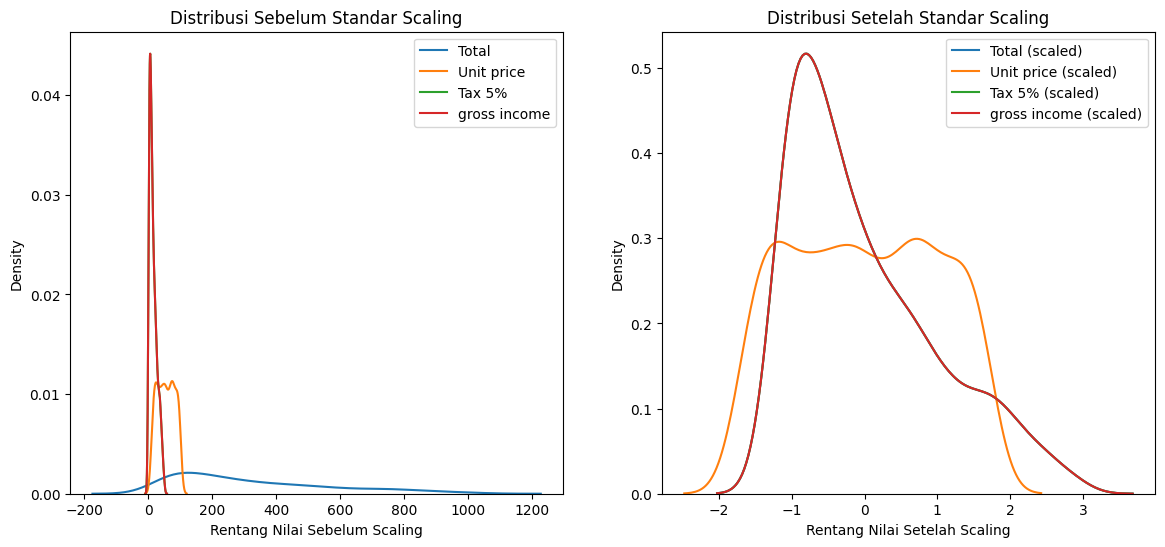

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribusi sebelum dan sesudah Standar Scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6)) # Perbesar figsize agar lebih jelas

# Plot distribusi sebelum Satndar Scaling
ax1.set_title('Distribusi Sebelum Standar Scaling')
sns.kdeplot(data=append_df, x='Total', ax=ax1, label='Total')
sns.kdeplot(data=append_df, x='Unit price', ax=ax1, label='Unit price')
sns.kdeplot(data=append_df, x='Tax 5%', ax=ax1, label='Tax 5%')
sns.kdeplot(data=append_df, x='gross income', ax=ax1, label='gross income')
ax1.set_xlabel('Rentang Nilai Sebelum Scaling')

# Plot distribusi setelah Standar Scaling
ax2.set_title('Distribusi Setelah Standar Scaling')
sns.kdeplot(data=append_df, x='Total_stdscaled', ax=ax2, label='Total (scaled)')
sns.kdeplot(data=append_df, x='Unit price_stdscaled', ax=ax2, label='Unit price (scaled)')
sns.kdeplot(data=append_df, x='Tax 5%_stdscaled', ax=ax2, label='Tax 5% (scaled)')
sns.kdeplot(data=append_df, x='gross income_stdscaled', ax=ax2, label='gross income (scaled)')
ax2.set_xlabel('Rentang Nilai Setelah Scaling')


ax1.legend()
ax2.legend()

**Interpretasi**
- Panel kiri (Sebelum standard scaller) <br>
Pada panel ini, distribusi masih dalam skala aslinya dimana rentangnya ada yang dari -200 hingga 1000 lebih. Distribusi total terlihat sangat menyebar dan gross income dan tax 5% yang sangat padat di nilai rendah

- Panel kanan (Setelah standard scaller) <br>
Pada panel ini, data distribusi lebih terlihat menyerupai bentuk asli namun seluruh fiturnya berada di skala yang beragam, tidak menumpuk seperti sebelumnya

In [ ]:
scaled_df.describe()

,Total_stdscaled,Unit price_stdscaled,Tax 5%_stdscaled,gross income_stdscaled
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,3.197442e-17,-1.065814e-16,1.243450e-16,1.243450e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.270692e+00,-1.721668e+00,-1.270692e+00,-1.270692e+00
25%,-8.078714e-01,-8.608740e-01,-8.078714e-01,-8.078714e-01
50%,-2.812422e-01,-1.669588e-02,-2.812422e-01,-2.812422e-01
75%,6.037682e-01,8.406991e-01,6.037682e-01,6.037682e-01
max,2.928371e+00,1.672416e+00,2.928371e+00,2.928371e+00


# No. 3 Min Max for EDA

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Kolom-kolom yang ingin dinormalisasi
columns_to_minmax = ['Total', 'Unit price','Tax 5%','gross income']

# Inisialisasi MinMaxScaler
minmax = MinMaxScaler()

In [ ]:
minmax_df= scaler.fit_transform(df_market[columns_to_minmax])

In [ ]:
minmax_df = pd.DataFrame(minmax_df, columns=[col + '_minmax' for col in columns_to_minmax])

In [ ]:
append_minmaxdf = pd.concat([df_market[columns_to_minmax], minmax_df], axis=1)

In [ ]:
append_minmaxdf

,Total,Unit price,Tax 5%,gross income,Total_minmax,Unit price_minmax,Tax 5%_minmax,gross income_minmax
0,548.9715,74.69,26.1415,26.1415,0.919607,0.718160,0.919607,0.919607
1,80.2200,15.28,3.8200,3.8200,-0.987730,-1.525303,-0.987730,-0.987730
2,340.5255,46.33,16.2155,16.2155,0.071446,-0.352781,0.071446,0.071446
3,489.0480,58.22,23.2880,23.2880,0.675780,0.096214,0.675780,0.675780
4,634.3785,86.31,30.2085,30.2085,1.267125,1.156959,1.267125,1.267125
...,...,...,...,...,...,...,...,...
995,42.3675,40.35,2.0175,2.0175,-1.141750,-0.578600,-1.141750,-1.141750
996,1022.4900,97.38,48.6900,48.6900,2.846340,1.574989,2.846340,2.846340
997,33.4320,31.84,1.5920,1.5920,-1.178109,-0.899958,-1.178109,-1.178109
998,69.1110,65.82,3.2910,3.2910,-1.032932,0.383208,-1.032932,-1.032932


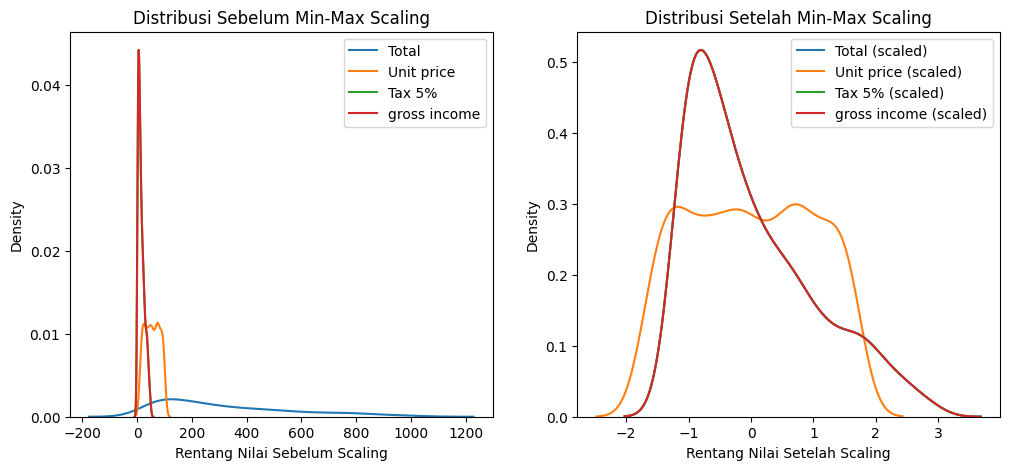

In [ ]:
# Plot distribusi sebelum dan sesudah Min-Max Scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5)) # Perbesar figsize agar lebih jelas

# Plot distribusi sebelum Min-Max Scaling
ax1.set_title('Distribusi Sebelum Min-Max Scaling')
sns.kdeplot(data=append_minmaxdf, x='Total', ax=ax1, label='Total')
sns.kdeplot(data=append_minmaxdf, x='Unit price', ax=ax1, label='Unit price')
sns.kdeplot(data=append_minmaxdf, x='Tax 5%', ax=ax1, label='Tax 5%')
sns.kdeplot(data=append_minmaxdf, x='gross income', ax=ax1, label='gross income')
ax1.set_xlabel('Rentang Nilai Sebelum Scaling')

# Plot distribusi setelah Min-Max Scaling
ax2.set_title('Distribusi Setelah Min-Max Scaling')
sns.kdeplot(data=append_minmaxdf, x='Total_minmax', ax=ax2, label='Total (scaled)')
sns.kdeplot(data=append_minmaxdf, x='Unit price_minmax', ax=ax2, label='Unit price (scaled)')
sns.kdeplot(data=append_minmaxdf, x='Tax 5%_minmax', ax=ax2, label='Tax 5% (scaled)')
sns.kdeplot(data=append_minmaxdf, x='gross income_minmax', ax=ax2, label='gross income (scaled)')
ax2.set_xlabel('Rentang Nilai Setelah Scaling')


ax1.legend()
ax2.legend()

**Interpretasi :**

- Panel kiri (Sebelum min max scaller) <br>
Pada panel ini, distribusi masih dalam skala aslinya dimana rentangnya ada yang dari -200 hingga 1000 lebih. Distribusi total terlihat sangat menyebar dan gross income yang sangat padat di nilai rendah

- Panel kanan (Setelah min max scaller) <br>
Pada panel ini, data distribusi lebih terlihat menyerupai bentuk asli namun seluruh fiturnya berada di skala yang beragam, tidak menumpuk seperti sebelumnya

In [ ]:
minmax_df.describe()

,Total_minmax,Unit price_minmax,Tax 5%_minmax,gross income_minmax
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,3.197442e-17,-1.065814e-16,1.243450e-16,1.243450e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.270692e+00,-1.721668e+00,-1.270692e+00,-1.270692e+00
25%,-8.078714e-01,-8.608740e-01,-8.078714e-01,-8.078714e-01
50%,-2.812422e-01,-1.669588e-02,-2.812422e-01,-2.812422e-01
75%,6.037682e-01,8.406991e-01,6.037682e-01,6.037682e-01
max,2.928371e+00,1.672416e+00,2.928371e+00,2.928371e+00
